# Prediction of wine quality using different ML classifiers

In this notebook, I have done some data exploration using matplotlib and seaborn. 

Here I have used different classifier models to predict the wine quality: 

1.   K-Nearest Neighbors Classifier
2.   Support Vector Classifier
3.   Random Forest Classifier

Here we classified wine qualities into 3 different categories as good, average and bad.

### Dataset Information:


The two datasets are related to red and white variants of the Portuguese “Vinho Verde” wine.

Attribute information:
Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol Output variable (based on sensory data)
12. quality (score between 0 and 10)

### Implementing various classifiers using Python

**Import required modules:**

In [0]:
import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Get the data:**

In [3]:
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Lets’s check any missing values exist in the data collection.

In [5]:
data.isnull().values.any()

False

**Create a new feature as category to classify the wine quality**

In [0]:
quality = data["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Average")

In [7]:
#Create a new feature for wine category.
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([data,category],axis=1)
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Average
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Average


**Let’s explore the data**

In [8]:
data.category.value_counts()

Average    1319
Good        217
Bad          63
Name: category, dtype: int64

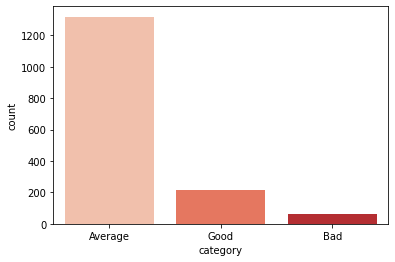

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data["category"], palette="Reds")

**Check the correlation for each fields:**

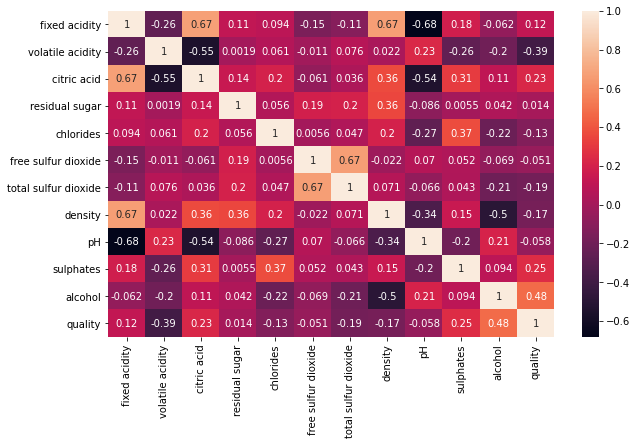

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

According to heatmap, we can focus on **alcohol, sulphates, density, and quality** relations to get meaningful insight.

Let’s draw the pairplot to see the data distribution for above highlighted features.

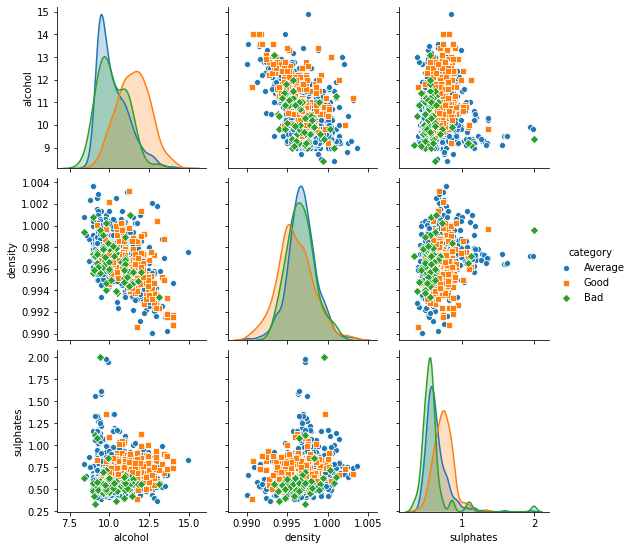

In [11]:
sns.pairplot(data, vars=["alcohol", "density", "sulphates"], hue="category", markers=["o", "s", "D"])

 Find the relationship between density and alcohol.

<Figure size 864x432 with 0 Axes>

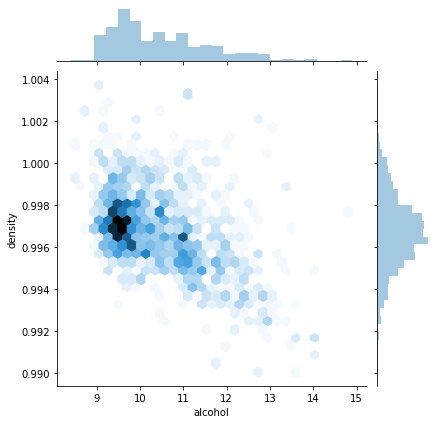

In [12]:
plt.figure(figsize=(12,6))
sns.jointplot(y=data["density"],x=data["alcohol"],kind="hex")

 Explore the quality data distribution.

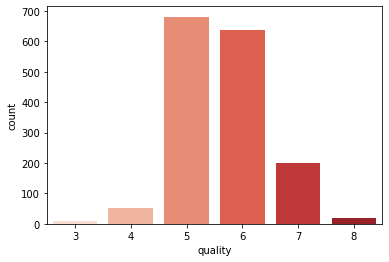

In [13]:
sns.countplot(x='quality', data=data, palette="Reds")

Find the relationship between alcohol and quality.

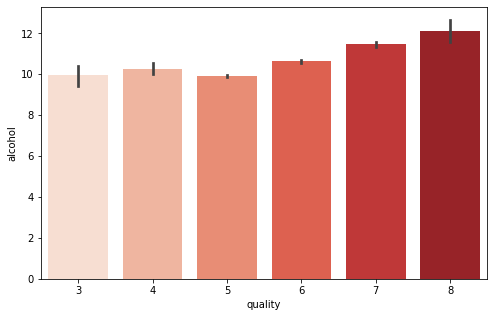

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x=data["quality"],y=data["alcohol"],palette="Reds")

Extracting relevant features for data processing.

In [15]:
headerNames = ['alcohol', 'density', 'sulphates', 'category']
df = data[headerNames]
df.head()

,alcohol,density,sulphates,category
0,9.4,0.9978,0.56,Average
1,9.8,0.9968,0.68,Average
2,9.8,0.9970,0.65,Average
3,9.8,0.9980,0.58,Average
4,9.4,0.9978,0.56,Average


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 4 columns):
alcohol      1599 non-null float64
density      1599 non-null float64
sulphates    1599 non-null float64
category     1599 non-null object
dtypes: float64(3), object(1)
memory usage: 50.1+ KB


Data Preprocessing will be done with the help of following script lines.

In [17]:
# create design matrix X and target vector y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y

array(['Average', 'Average', 'Average', ..., 'Average', 'Average',
       'Average'], dtype=object)

In [0]:
# Transforming non-numerical labels (as long as they are hashable and comparable) to numerical labels.
# from sklearn.preprocessing import LabelEncoder
# labelencoder_y =LabelEncoder()
# y= labelencoder_y.fit_transform(y)

In [19]:
 print(np.unique(y)) 

['Average' 'Bad' 'Good']


We have used, train_test_split() function that we imported from sklearn to split the data. Notice we have used test_size=0.25 to make the test data 25% of the original data. The rest 80% is used for training.

In [0]:
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Here we will use  standardscalaer() function from sklear library to normalize the values to improve the model accuracy.

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

This function will be use to print the classification report.

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def print_classification_report(title, y_test, y_pred):
  '''
  This function is used to print the classification report.
  '''

  print(title + " \n")

  # validate the prediction result.
  result = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix:")
  print(result)

  print("\n")

  # evaluate the prediction report.
  result1 = classification_report(y_test, y_pred)
  print("Classification Report:",)
  print (result1)

  # evaluate accuracy.
  result2 = accuracy_score(y_test, y_pred)
  print("Accuracy:", result2)

Create two variables to capture the accuracy of different models.

In [0]:
models = []
accuracies = []


**Implement K-Nearest Neighbors Classifier**

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 8)
knn = KNeighborsClassifier(n_neighbors = 8)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# Capture the accuracy score.
# accuracy_dict.__setitem__("KNN", accuracy_score(y_test, y_pred))
models.append("KNN")
accuracies.append(accuracy_score(y_test, y_pred))

# Print the classification report.
print_classification_report("K-Nearest Neighbors Classifier Report:", y_test, y_pred)

K-Nearest Neighbors Classifier Report: 

Confusion Matrix:
[[318   0  14]
 [ 20   0   0]
 [ 31   0  17]]


Classification Report:
              precision    recall  f1-score   support

     Average       0.86      0.96      0.91       332
         Bad       0.00      0.00      0.00        20
        Good       0.55      0.35      0.43        48

    accuracy                           0.84       400
   macro avg       0.47      0.44      0.45       400
weighted avg       0.78      0.84      0.80       400

Accuracy: 0.8375


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Implement Random Forest Classifier**


In [25]:
from sklearn.ensemble import RandomForestClassifier

# instantiate learning model
rfc = RandomForestClassifier(n_estimators=250)

# fitting the model
rfc.fit(X_train, y_train)

# predict the response
y_pred = rfc.predict(X_test)

# Capture the accuracy score.
# accuracy_dict.__setitem__("Random Forest", accuracy_score(y_test, y_pred))
models.append("Random Forest")
accuracies.append(accuracy_score(y_test, y_pred))


# Print the classification report.
print_classification_report("Random Forest Classifier Report:", y_test, y_pred)

Random Forest Classifier Report: 

Confusion Matrix:
[[312   0  20]
 [ 20   0   0]
 [ 17   0  31]]


Classification Report:
              precision    recall  f1-score   support

     Average       0.89      0.94      0.92       332
         Bad       0.00      0.00      0.00        20
        Good       0.61      0.65      0.63        48

    accuracy                           0.86       400
   macro avg       0.50      0.53      0.51       400
weighted avg       0.81      0.86      0.84       400

Accuracy: 0.8575


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Implement Support Vector Machine Classifier**

In [26]:
from sklearn.svm import SVC

# instantiate learning model
svc = SVC()

# fitting the model
svc.fit(X_train,y_train)

# predict the response
y_pred =svc.predict(X_test)

# Capture the accuracy score.
# accuracy_dict.__setitem__("SVM", accuracy_score(y_test, y_pred))
models.append("SVM")
accuracies.append(accuracy_score(y_test, y_pred))

# Print the classification report.
print_classification_report("Support Vector Machine Classifier Report:", y_test, y_pred)

Support Vector Machine Classifier Report: 

Confusion Matrix:
[[327   0   5]
 [ 20   0   0]
 [ 38   0  10]]


Classification Report:
              precision    recall  f1-score   support

     Average       0.85      0.98      0.91       332
         Bad       0.00      0.00      0.00        20
        Good       0.67      0.21      0.32        48

    accuracy                           0.84       400
   macro avg       0.51      0.40      0.41       400
weighted avg       0.78      0.84      0.80       400

Accuracy: 0.8425


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Finding the right K value for KNN model.**

Text(0, 0.5, 'Accuracy')

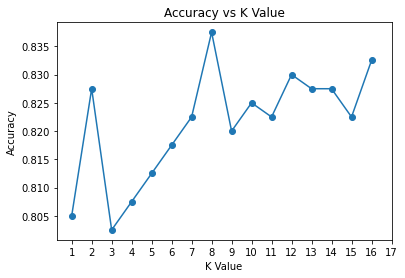

In [27]:
#for checking the model accuracy
from sklearn import metrics 

a_index=list(range(1,17))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

for i in list(range(1,17)):
    knn=KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train,y_train)
    prediction=knn.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))

plt.plot(a_index, a, marker="o")
plt.xticks(x)
plt.title("Accuracy vs K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")

In [28]:
report = pd.DataFrame({'model': models, 'accuracy': accuracies})
report


,model,accuracy
0,KNN,0.8375
1,Random Forest,0.8575
2,SVM,0.8425


This gives us the accuracy above 80% using above three classifiers models. Overall our predictor performs quite well, in-fact any accuracy % greater than 80% is considered as great.

If we choose one out of all these classifiers, then Random Forest accuracy is 82% which quite better than others. 

If you find this blog useful then please like this page.

**Help Materials:**

Blog: https://medium.com/themlblog/wine-quality-prediction-using-machine-learning-59c88a826789

Data Info: http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality.names